<a href="https://colab.research.google.com/github/rxshoumoun/CodSoft/blob/main/Movie%20Rating%20Prediction/Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/IMDb Movies India.csv', encoding='latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
df.dropna(inplace=True)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [9]:
df.shape

(5659, 10)

In [10]:
df.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [11]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [12]:
top_movies = df.sort_values(by='Rating', ascending=False).head(10)
top_movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,(2020),94 min,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,(2021),79 min,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
6852,June,(2021),93 min,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
14222,The Reluctant Crime,(2020),113 min,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,(2019),105 min,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
1314,Ashok Vatika,(2018),97 min,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
13231,Sindhustan,(2019),64 min,"Documentary, Family, History",9.3,36,Sapna Bhavnani,Leila Advani,Laj Badlani,Chaho Bhara
8344,Love Sorries,(2021),101 min,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
12673,Secrets of Sinauli,(2021),56 min,"Documentary, History",9.3,"1,373",Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
11843,Refl3ct,(2021),65 min,Sci-Fi,9.3,467,Nikhil Mahar,Vijay Mahar,Vijay Mahar,Nikhil Mahar


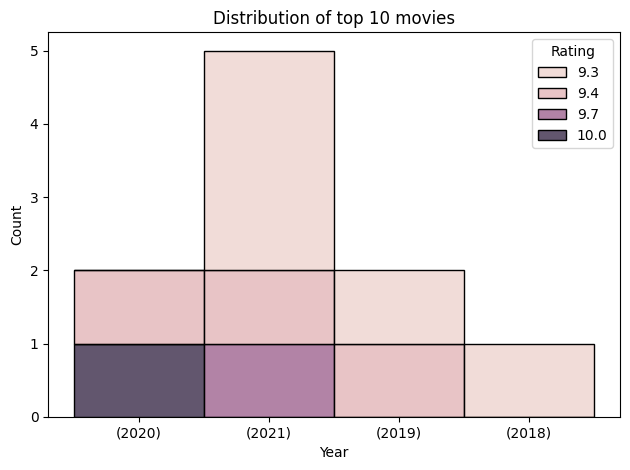

In [13]:
sns.histplot(data=top_movies, x="Year", hue = "Rating", multiple= "stack")
plt.title('Distribution of top 10 movies')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [14]:
genre_count = df['Genre'].value_counts().reset_index()
genre_count.columns = ['Genre', 'Count']
top_genre = genre_count.head(5)
top_genre


,Genre,Count
0,Drama,844
1,"Drama, Romance",332
2,"Action, Crime, Drama",329
3,"Action, Drama",206
4,"Comedy, Drama",205


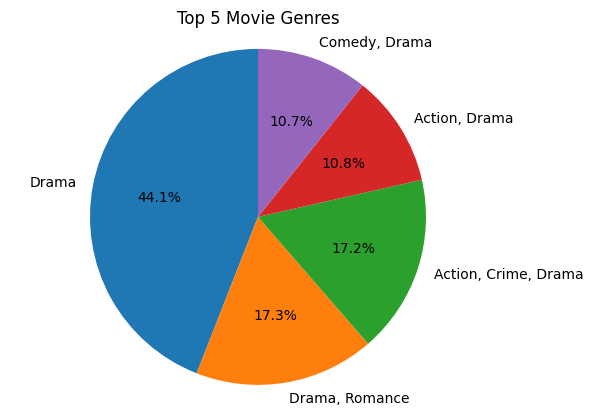

In [15]:
plt.pie(top_genre['Count'], labels=top_genre['Genre'], autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Movie Genres')
plt.axis('equal')
plt.show()

<ipython-input-16-2f0c7f649298>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_movies, x='Rating', y='Director',palette='viridis')


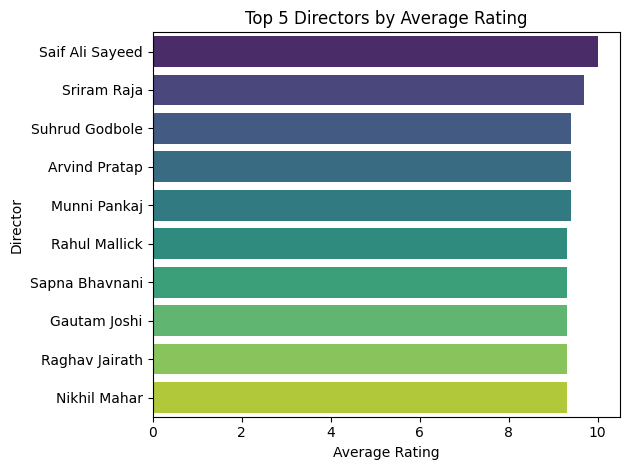

In [16]:
sns.barplot(data=top_movies, x='Rating', y='Director',palette='viridis')
plt.title('Top 5 Directors by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

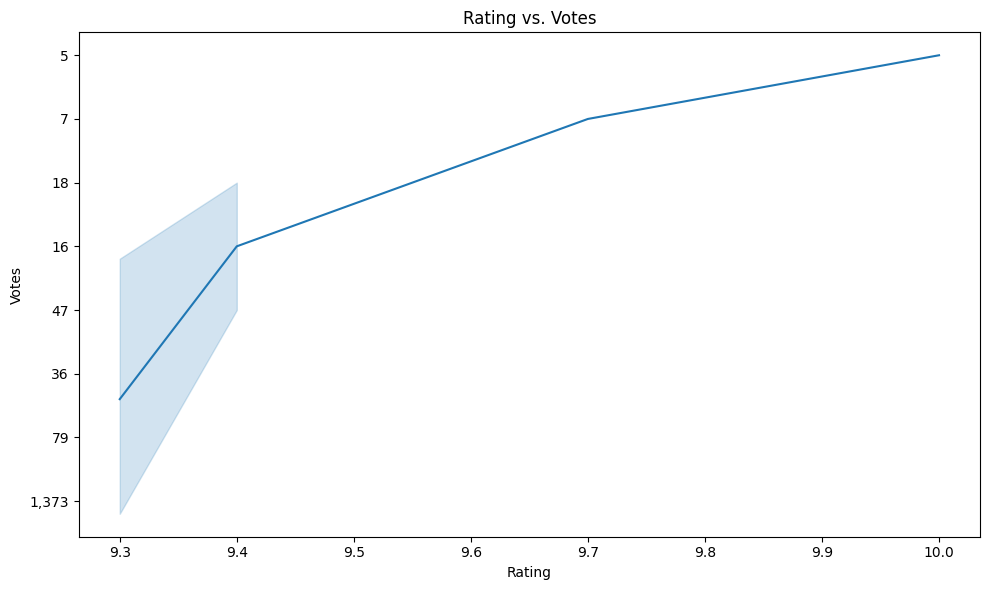

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=top_movies, x='Rating', y='Votes')
plt.title('Rating vs. Votes')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.tight_layout()
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
  if df[col].dtype == 'object':
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,0,88,9,229,7.0,1843,629,1352,2272,319
3,1,88,10,184,4.4,1164,1335,1198,719,2148
5,3,66,47,157,4.7,1892,1530,378,75,2045
6,4,74,42,289,7.4,34,2044,692,1112,2524
8,76,81,156,320,5.6,1133,135,1934,1175,1013


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.000000,0.977778,0.052023,0.610667,0.662921,0.909674,0.258848,0.690148,0.979310,0.124853
1,0.000186,0.977778,0.057803,0.490667,0.370787,0.574531,0.549383,0.611536,0.309914,0.840705
2,0.000557,0.733333,0.271676,0.418667,0.404494,0.933860,0.629630,0.192956,0.032328,0.800391
3,0.000743,0.822222,0.242775,0.770667,0.707865,0.016782,0.841152,0.353241,0.479310,0.987867
4,0.014116,0.900000,0.901734,0.853333,0.505618,0.559230,0.055556,0.987238,0.506466,0.396477


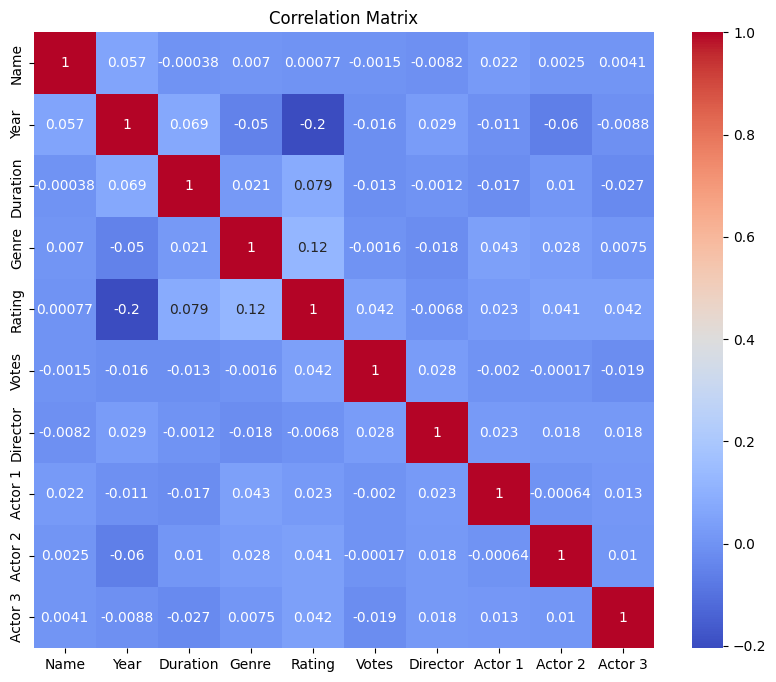

In [20]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [22]:
X = df.drop('Rating', axis=1)
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
lin_pred = linear_model.predict(X_test)

In [24]:
lin_mse = mean_squared_error(y_test, lin_pred)
lin_r2 = r2_score(y_test, lin_pred)
print(f'Linear Regression - Mean Squared Error: {lin_mse:.2f}, R-squared: {lin_r2:.2f}')

Linear Regression - Mean Squared Error: 1.72, R-squared: 0.07


In [25]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [36]:
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
print("Decision Tree Regressor")
print("MSE: ", dt_mse)
print("R2: ", dt_r2)

Decision Tree Regressor
MSE:  2.9233303886925794
R2:  -0.5786906545083876


In [32]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [33]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f'Random Forest Regression - Mean Squared Error: {rf_mse:.2f}, R-squared: {rf_r2:.2f}')

Random Forest Regression - Mean Squared Error: 1.56, R-squared: 0.16


In [40]:
metrics = {
    'Algorithm': ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression'],
    'Mean Squared Error': [lin_mse, dt_mse, rf_mse],
    'R-squared': [lin_r2, dt_r2, rf_r2]
}
metrics_df = pd.DataFrame(metrics)
metrics_df

,Algorithm,Mean Squared Error,R-squared
0,Linear Regression,1.722162,0.069978
1,Decision Tree Regression,2.923330,-0.578691
2,Random Forest Regression,1.557580,0.158858


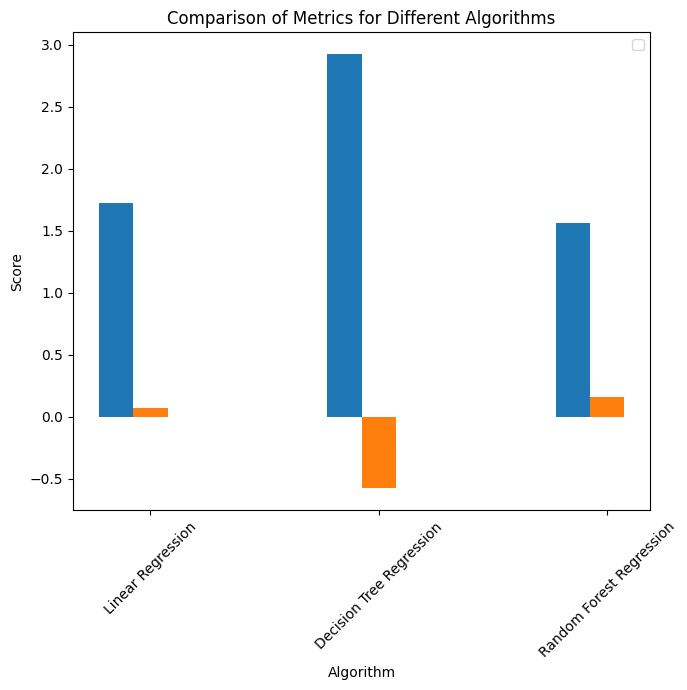

In [41]:
bar_width = 0.15
positions = np.arange(len(metrics_df['Algorithm']))

# Plotting
plt.figure(figsize=(7, 7))
bar1 = plt.bar(positions - bar_width, metrics_df['Mean Squared Error'], bar_width)
bar2 = plt.bar(positions, metrics_df['R-squared'], bar_width )

# Adding labels
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.title('Comparison of Metrics for Different Algorithms')
plt.xticks(positions, metrics_df['Algorithm'], rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()
